# Trabajo Practico Integrador - Modulo 2

In [1]:
#Import de librerias
import pandas as pd
import numpy as np
import re
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import shapely # genera las figuras geometricas
import descartes # relaciona shapely con matplotlib
import pyproj # proyecciones. Transformar coordenadas
#import seaborn as sns #Libreria Seaborn 

In [2]:
#Especificacion de ruta de dataset
#data_location = "../Trabajo Integrador/properatti.csv" 

In [3]:
#Lectura de dataset
data = pd.read_csv("properatti.csv")
data.shape

(121220, 26)

In [4]:
data.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [5]:
data.dtypes #Tipos de datos del dataset

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

In [6]:
#Identificamos la cantidad de nulos por campo
cant_nulos_por_campo = data.apply(lambda x: x.isnull().sum(), axis=0)
print(cant_nulos_por_campo) 

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64


In [7]:
#Cantidad de registros y porcentaje de nulos sobre total de registros
cant_registros = data.shape[0]
print('Cantidad total de registros:\n', cant_registros)

prop_nulos_por_campo = 100 * cant_nulos_por_campo / cant_registros
#print(prop_nulos_por_campo)
#prop_nulos_por_campo.sort_values(ascending=False)
print ('\n Proporción de nulos sobre total de registros por columna:\n', prop_nulos_por_campo.sort_values(ascending=False))

Cantidad total de registros:
 121220

 Proporción de nulos sobre total de registros por columna:
 floor                         93.483749
expenses                      88.234615
rooms                         60.905791
price_usd_per_m2              43.394654
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
surface_total_in_m2           32.443491
price_per_m2                  27.686850
currency                      16.837981
price_aprox_local_currency    16.837156
price                         16.837156
price_aprox_usd               16.837156
surface_covered_in_m2         16.422208
geonames_id                   15.440521
image_thumbnail                2.567233
place_name                     0.018974
description                    0.001650
operation                      0.000000
state_name                     0.000000
country_name                   0.000000
place_with_parent_names        0.000000
property_type         

Se analizan los campos con mayor porcentaje de nulos.
- Floor
- Expenses
- Rooms

Se puede observar que el 17% de los registros no tienen precio asignado y entre un 27% y 32% no tiene la superficie (m2) especificada.

In [8]:
data['expenses'] # El campo con mayor cantidad de nulos

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
121215    10000.0
121216        NaN
121217        NaN
121218        NaN
121219     3500.0
Name: expenses, Length: 121220, dtype: float64

In [9]:
data['floor'] # El campo con mayor cantidad de nulos

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
121215   NaN
121216   NaN
121217   NaN
121218   NaN
121219   NaN
Name: floor, Length: 121220, dtype: float64

In [10]:
valores_unicos = data.nunique() #Obtenemos los valores unicos para identificar las opciones de cada campo
print ('Valores unicos por columna:\n',valores_unicos)

Valores unicos por columna:
 Unnamed: 0                    121220
operation                          1
property_type                      4
place_name                      1060
place_with_parent_names         1164
country_name                       1
state_name                        28
geonames_id                      646
lat-lon                        47203
lat                            46495
lon                            46522
price                           9746
currency                           4
price_aprox_local_currency     10364
price_aprox_usd                10364
surface_total_in_m2             1687
surface_covered_in_m2            995
price_usd_per_m2               25566
price_per_m2                   25185
floor                            182
rooms                             31
expenses                         982
properati_url                 121220
description                   104055
title                          72705
image_thumbnail               114389
dtype: in

Se observa que algunos campos tienen pocos valores unicos, ejemplo "operation", "country_name", "property_type" y "currency"

Visualizamos los valores unicos de cada columna para definir si son relavantes o no.

Los campos "Expensas" y "Floor" contiene el 88% y 93% de nulos por lo cual no aportan mucha información y se eliminarán.

In [11]:
data['operation'].unique() #No es relevante. Toda la operacion registrada es de ventas.

array(['sell'], dtype=object)

In [12]:
data['country_name'].unique() #Es relevante

array(['Argentina'], dtype=object)

In [13]:
data['property_type'].unique() #Es relevate

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [14]:
data['currency'].unique() #Es relevante y contiene valores nulos

array(['USD', nan, 'ARS', 'PEN', 'UYU'], dtype=object)

In [15]:
data.currency.value_counts() #Es relevante. Contiene valores que pueden distorsionar.

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [16]:
#Eliminemos estas pocas filas que tienen valor que no son ARS o USD

Los campos "Expensas" y "Floor" contiene el 88% y 93% de nulos por lo cual no aportan mucha información y se eliminarán.

In [17]:
#Eliminamos los que no aporta información relevante para el analisis:
#Expensas: por tener un 88% de valores nulos e incompletos. 
#Operacion: todas las operaciones del dataset son ventas - Se elimina.
#Floor: 94% de valores nulos
#Imagen: No es relevante para el analisis.
#Unnamed:0 : No es relevante para el analisis pero funciona como indice. No se elimina.
#Properati_url : no es relavante para el análisis.
data = data.drop(['operation', 'expenses', 'floor', 'image_thumbnail', 'properati_url'], axis=1)

In [18]:
data.description.sample(15) #Descripciones 

78308     VENTA DUPLEX 3 AMBIENTES EN OLIVOSEmprendimien...
16265     Corredor Responsable: Martin Veltri - C.M.Q 80...
39876     Venta de Departamento 2 AMBIENTES en Caseros, ...
63777     Departamento de dos ambientes, con 53 m2 de su...
33186     VENDO!!! CASA 3 DORM. EN Bº PUEYRREDON!!! CON ...
116893    EXCELENTE LOCAL DE 5.00X31.70 APTO TODO RUBRO,...
96630     Amplio departamento o oficina con la posibilid...
8096      Hermoso departamento de 4 ambientes con muy bu...
38881     Un barrio exclusivo que interpreta, como ningú...
58952     CODIGO: 735-salcedoph ubicado en: Salcedo 2614...
8612      Corredor Responsable: Rebeca Stern - C.U.C.I.C...
50645     CODIGO: 1 ubicado en: Malabia 2233 -  Publicad...
68295     Esta propiedad está sobre un gran lote con Par...
65152     Muy buen  chalet  en dos plantas sobre lote  d...
9443      En el Condominio Pasionaria MartÃ­nez, Lima y ...
Name: description, dtype: object

In [19]:
data.title.sample(15) #Titulo

61071                                 DEPARTAMENTO EN VENTA
19047      DTO. 4 AMB. C/DEP. 120 M2. - CENTRO APTO CREDITO
29547                             2 dormitorios OM Recoleta
50354     EXCLUSIVO DEPARTAMENTO A METROS DEL MAR - PINA...
64760                       LOCAL 628 M2,FRENTE A UNICENTER
4644      VENDO HERMOSO DEPARTAMENTO EN BARRIO BARRANQUITAS
70919                                    Propiedad en venta
41294                                         CASA EN VENTA
61138                                 DEPARTAMENTO EN VENTA
72078                                           PH - Flores
73925                                      PH - Lanús Oeste
120488                                    Casa - San Isidro
30770                                       BV. URQUIZA 200
56944     Departamento en Venta. Ambientes. Dormitorios....
59941                  OPORTUNIDAD! CASA en buena ubicacion
Name: title, dtype: object

In [20]:
#Renombramos los campos que vamos a utilizar en el DataFrame
data.rename(columns={'Unnamed: 0': 'Index','property_type': 'Propiedad',
                    'place_name': 'Barrio',
                    'place_with_parent_names': 'Ubicacion',
                    'country_name': 'Pais',
                    'state_name': 'Provincia',
                    'geonames_id': 'ID_GeoName',
                    'lat-lon': 'Latitud_Longitud',
                    'lat': 'Latitud',
                    'lon': 'Longitud',
                    'price': 'Precio',
                    'currency': 'Moneda',
                    'price_aprox_local_currency': 'Precio_ARS',
                    'price_aprox_usd': 'Precio_USD',
                    'surface_total_in_m2': 'M2_Totales',
                    'surface_covered_in_m2': 'M2_Cubiertos',
                    'price_usd_per_m2': 'Precio_M2_USD',
                    'price_per_m2': 'Precio_M2',
                    'rooms': 'Cant_ambientes',
                    'description': 'Descripcion',
                    'title': 'Titulo'}, inplace=True)
data.dtypes

Index                 int64
Propiedad            object
Barrio               object
Ubicacion            object
Pais                 object
Provincia            object
ID_GeoName          float64
Latitud_Longitud     object
Latitud             float64
Longitud            float64
Precio              float64
Moneda               object
Precio_ARS          float64
Precio_USD          float64
M2_Totales          float64
M2_Cubiertos        float64
Precio_M2_USD       float64
Precio_M2           float64
Cant_ambientes      float64
Descripcion          object
Titulo               object
dtype: object

# Limpieza de DataSet

Teniendo en cuenta los porcentajes de nulos por campo, inicialmente nos enfocamos en formatear las columnas de Precio, Superficie (M2) y cantidad de ambientes dado que son relevantes para el analisis.

In [21]:
#Calculamos las estadisticas de las columnas numéricas más importantes
data_f=data.loc[:,['ID_GeoName','Precio','Precio_ARS','Precio_USD','M2_Totales','M2_Cubiertos','Precio_M2_USD','Precio_M2','Cant_ambientes']]

data_f.describe(include='all') #La funcion "describe" devuelve las estadistica generales de un dataframe.

,ID_GeoName,Precio,Precio_ARS,Precio_USD,M2_Totales,M2_Cubiertos,Precio_M2_USD,Precio_M2,Cant_ambientes
count,1.025030e+05,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,47390.000000
mean,3.574442e+06,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,3.080840
std,3.541306e+05,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,1.860773
min,3.427208e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000
25%,3.430234e+06,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,2.000000
50%,3.433910e+06,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000
75%,3.836668e+06,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,4.000000
max,6.948895e+06,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,32.000000


De este analisis se pueden extraer alguna conclusiones:

- Tenemos filas con precio o M2 Totales en 0, lo que podria implicar un problema a la hora de determinar el valor del M2, por lo que deberiamos analizar como tratarlas.

- En M2 Totales además podemos estar en presencia de un fuerte outliers, ya que tenemos 75: de los datos en 200m2, pero una fila llega hasta 200.000 m2, pudiendo distorsionar nuestros futuros cálculos. 

- Se puede apreciar cómo afecta esto al desvío STD, que termina siendo de 8 veces la media. Debemos arreglar esta situación.

- Tiene cierta lógica la carga en cantidad de ambientes. El problema se nos genera en la gran cantidad de nulos (60%). Posiblemente no podamos utilizarla si no encontramos una manera acorde de completar esta columna.


Analizando la descripción de las propiedades identificamos algunas posibles propiedades fuera del grupo princiapal (Store, PH, casa, local..) Para determinar esta nueva agrupación, definimos una nueva columna "Tipo_propiedad_nuevo" que contendrá los valores obtenidos de parsear las descripciones.

In [22]:
# Parseamos en la descripcion y la almacenamos en una lista:
##Pasamos el campo Descripcion a tipo string:
data['Descripcion'] = data['Descripcion'].fillna('NaN')

#Definimos una funcion para que a partir de un patron, parsee el campo necesario en el dataframe en formato string:
def parsear_str(dataframe,columna,columna_2,patron):
    df_lista = []
    longitud = len(dataframe)
    serie_type = dataframe[columna]
    serie_type_2 = dataframe[columna_2]
    for x in range(longitud):
        string = serie_type.loc[x]
        match = re.search(patron, string, flags = re.IGNORECASE)
        if match:
            df_lista.append(str.upper(match.group(1)))
        else:
            df_lista.append(str.upper(serie_type_2.loc[x]))
    return df_lista

#Definimos una funcion que a partir de un patron, parsee un campo del dataframe en formato integer:
#Si no hay coincidencia, completa con un NaN.

def parsear_int(dataframe,columna, patron):
    df_lista = []
    longitud = len(dataframe)
    serie_type = dataframe[columna]
    for x in range(longitud):
        string = serie_type.loc[x]
        match = re.search(patron, string, flags = re.IGNORECASE)
        if match:
            df_lista.append(int(match.group(1))) 
        else:
            df_lista.append(np.NaN)
    return df_lista

In [23]:
#Parseamos finalmente la descripcion para componer el campo de propiedad.
patron = r'(\b(hotel|desarrollo inmobiliario|hostel|complejo|galpon|local|edificio venta en pozo)\b)'    

data['Tipo_propiedad_nuevo'] = parsear_str(data,'Descripcion','Propiedad', patron)

data['Tipo_propiedad_nuevo'] = data['Tipo_propiedad_nuevo'].replace(['LOCAL'],'STORE') 

data['Tipo_propiedad_nuevo'].unique()

array(['PH', 'APARTMENT', 'HOUSE', 'COMPLEJO', 'STORE', 'GALPON', 'HOTEL',
       'HOSTEL', 'DESARROLLO INMOBILIARIO', 'EDIFICIO VENTA EN POZO'],
      dtype=object)

In [24]:
#Veamos cuantas propiedades hay por tipo
data.Tipo_propiedad_nuevo.value_counts()

APARTMENT                  64819
HOUSE                      37077
STORE                       6944
PH                          5378
COMPLEJO                    5374
HOTEL                        680
GALPON                       637
DESARROLLO INMOBILIARIO      242
HOSTEL                        67
EDIFICIO VENTA EN POZO         2
Name: Tipo_propiedad_nuevo, dtype: int64

En gran cantidad de casos, figuran los ambientes en la descripción seguido de un espacio más la palabra "ambientes", "habitaciones", "dormitorios", etc. De esa manera podemos armar nuestro patron para la expresion regular que nos permita recuperar los ambientes faltantes. Reutilizaremos la funcion "parsear_int" que ya definimos.

In [25]:
# Parseamos la descripcion buscando el patron

patron = r'(\d+)(\s)(\b(ambientes|ambiente|amb|cuarto|cuartos|habitacion|habitaciones|dormitorio|dormitorios|dorm|hab)\b)'

data['Ambientes_Nuevo'] = parsear_int(data,'Descripcion',patron)

data.Ambientes_Nuevo.value_counts()

2.0        24878
3.0        22683
4.0         9570
1.0         8758
5.0         2365
           ...  
13562.0        1
622.0          1
412.0          1
42024.0        1
652.0          1
Name: Ambientes_Nuevo, Length: 165, dtype: int64

Reemplazamos los valores obtenidos y completamos los nulos de la columna "Cant_ambientes" del dataframe original.

Nota: tomaremos como premisa que ambientes superiores de 7 corresponden a propiedades "no estandares" como desarrollos inmobiliarios, hoteles, hoteles, etc. Por lo cual, mantendremos los casos extremos.

In [26]:
data['Cant_ambientes'] = data['Cant_ambientes'].fillna(data['Ambientes_Nuevo'][data['Ambientes_Nuevo'] < 7])

In [27]:
data['Cant_ambientes'].isnull().value_counts()

False    86078
True     35142
Name: Cant_ambientes, dtype: int64

Sobre un total de 117616 lineas, la cantidad de nulos para el campo "Cant_ambientes" para de 60,9% a 29% ( de 73830 a 35142 registros nulos)

In [28]:
data.loc[:,['Cant_ambientes','Ambientes_Nuevo']]

,Cant_ambientes,Ambientes_Nuevo
0,2.0,2.0
1,NaN,NaN
2,2.0,2.0
3,3.0,3.0
4,1.0,1.0
...,...,...
121215,2.0,2.0
121216,3.0,3.0
121217,NaN,NaN
121218,2.0,2.0


Analizamos las columnas "Ubicacion" y "Barrio". Para mayor detalle, generamos una nueva columna "Barrio_2" para completar con los valores recuperados de la columna "Ubicacion".

In [29]:
#Utilizamos un bucle para recorrer los valores del campo "Ubicacion" y recuperamos el barrio.
#el Bucle tomara la columna ubicación, que en gral se compone de Pais/Provincia/localidad o Barrio.
# si no encuentra le tercer valor, al menos traera la provincia a la que pertenece.
lista = []
for i in range(len(data.index)):
    if data.Ubicacion[i].split(sep='|')[3] != '':
        lista.append(data.Ubicacion[i].split(sep='|')[3])
    else:
        lista.append(data.Ubicacion[i].split(sep='|')[2])

In [30]:
data.Ubicacion.nunique()

1164

In [31]:
data['Barrio_2']=lista

data.loc[:,['Barrio','Barrio_2']]

,Barrio,Barrio_2
0,Mataderos,Mataderos
1,La Plata,La Plata
2,Mataderos,Mataderos
3,Liniers,Liniers
4,Centro,Mar del Plata
...,...,...
121215,Belgrano,Belgrano
121216,Beccar,San Isidro
121217,Villa Urquiza,Villa Urquiza
121218,Plaza Colón,Mar del Plata


In [32]:
#vemos la cantidad de valores unicos de la anterior columna barrio con la nueva
data.Barrio.nunique(),data.Barrio_2.nunique()

(1060, 554)

Vemos que en esta nueva columna, obtenemos una baja relevante de valores diferentes, pasando a casi la mitad, lo que nos permite un mejor agrupamiento de las variables

Analizamos los posibles outliers de las columnas asociadas a metros cubiertos y metros totales.

Podemos considerar un desvío de +-3 para identificar outliers.

In [33]:
#La diferencia entre el valor y la media mayor o igual a 3 desvios estandar para evitar outliers
desvio_m2 = ((data_f['M2_Cubiertos'].std()))
desvio_m2_tot = ((data_f['M2_Totales'].std()))

outliers_m2 = data.loc[data['M2_Cubiertos']-data['M2_Cubiertos'].mean() >= (3*desvio_m2)]

outliers_m2_tot = data.loc[data['M2_Totales']-data['M2_Totales'].mean() >= (3*desvio_m2_tot)]

In [34]:
print(desvio_m2)
print(desvio_m2_tot)
print(len(outliers_m2))
print(len(outliers_m2_tot))

724.3514788261274
1782.2221470053162
163
167


In [35]:
data.loc[np.abs(data['M2_Cubiertos']-data['M2_Cubiertos'].mean()) >= (3*data['M2_Cubiertos'].std()),'M2_Cubiertos'] = np.nan
data.loc[np.abs(data['M2_Totales']-data['M2_Totales'].mean()) >= (3*data['M2_Totales'].std()),'M2_Totales'] = np.nan

Para los USD usaremos 2 desvios

In [36]:
desvio_USD = ((data_f['Precio_USD'].std()))
desvio_USD_tot = ((data_f['Precio_USD'].std()))

outliers_USD = data.loc[data['Precio_USD']-data['Precio_USD'].mean() >= (2*desvio_USD)]

outliers_USD_tot = data.loc[data['Precio_USD']-data['Precio_USD'].mean() >= (2*desvio_USD_tot)]
data.loc[np.abs(data['Precio_USD']-data['Precio_USD'].mean()) >= (2*data['Precio_USD'].std()),'Precio_USD'] = np.nan

Validamos los casos en donde la superficie cubierta es mayor que la superficie total. Esto podría corresponder a ingreso de datos erroneos (Se invirtieron las columnas al cargar los datos, error de tipeo...)

In [37]:
data.loc[data['M2_Cubiertos']>data['M2_Totales'],['M2_Totales','M2_Cubiertos']].sample(10)

,M2_Totales,M2_Cubiertos
41939,40.0,42.0
27835,118.0,132.0
21277,324.0,500.0
317,125.0,156.0
11319,45.0,50.0
34110,50.0,103.0
119846,110.0,140.0
78610,50.0,280.0
10208,342.0,348.0
107137,42.0,320.0


Para no tener esos desvios, podemos reemplazar la columna "M2_Cubiertos" por la columna "M2_Totales"

In [38]:
# Creamos un dataframe unicamente con los valores a reemplazar:
m2_data = data.loc[data['M2_Cubiertos'] > data['M2_Totales'],['M2_Totales']]

#Cambiamos el nombre de la columna para realizar el update
m2_data.columns = ['M2_Cubiertos']

#Actualizacion de los datos
data.update(m2_data)

In [39]:
data.loc[data['M2_Cubiertos']>data['M2_Totales'],['M2_Totales','M2_Cubiertos']]
#No hay más diferencias 

,M2_Totales,M2_Cubiertos


Si alguna de la columnas de superficie está completa, entonces podríamos completar las faltantes, para los casos que están vacíos.

In [40]:
data.loc[(data['M2_Cubiertos'].isnull())|(data['M2_Totales'].isnull()), ['M2_Cubiertos','M2_Totales']].sample(20)

,M2_Cubiertos,M2_Totales
119248,20.0,NaN
121183,NaN,48.0
54611,NaN,NaN
110217,55.0,NaN
77597,NaN,NaN
3783,1.0,NaN
107864,NaN,100.0
114682,350.0,NaN
41518,NaN,0.0
11789,63.0,NaN


In [41]:
#Completamos las columnas:
##Columna "M2_Cubiertos":
data['M2_Cubiertos'] = data['M2_Cubiertos'].fillna(data['M2_Totales'])
##Columna "M2_Totales":
data['M2_Totales'] = data['M2_Totales'].fillna(data['M2_Cubiertos'])

In [42]:
data.loc[(data['M2_Cubiertos'].isnull())|(data['M2_Totales'].isnull()), ['M2_Cubiertos','M2_Totales']].sample(10)

,M2_Cubiertos,M2_Totales
97091,NaN,NaN
76978,NaN,NaN
23983,NaN,NaN
41001,NaN,NaN
106742,NaN,NaN
17003,NaN,NaN
547,NaN,NaN
6202,NaN,NaN
10341,NaN,NaN
62535,NaN,NaN


In [43]:
print(data['M2_Cubiertos'].isnull().value_counts())
print ('------------------------------------------')
print(data['M2_Totales'].isnull().value_counts())

False    108751
True      12469
Name: M2_Cubiertos, dtype: int64
------------------------------------------
False    108751
True      12469
Name: M2_Totales, dtype: int64


Los casos faltantes son aquellos en los que ambos datos figuran vacios (NaN).
Podemos buscar la información dentro del campo "Descripcion" y utilizar una función "Parser" que utilizamos anteriormente.

Colocamos diversos patrones posibles, dado que la descripcion puede tener las superficies en numeros y/o letras. 
Además, podemos obtener valores incorrectos si hay descripciones, como por ejemplo: 100 metros de la plaza principal.

In [44]:
# Parseamos la descripcion buscando los patrones:
patron = r'(\d+)(\s?)(\b(m2)\b|metros cuadrados|ms|metros cubiertos|M2|MTS2\b)'
#patron_2 = r'(\d+)(\s?)(\b(metros cuadrados)\b)'

data['M2_descrip'] = parsear_int(data,'Descripcion', patron)

In [45]:
#Se completan los casos donde el valor es menor a la media mas 3 desvios
data['M2_Totales'] = data['M2_Totales'].fillna(data.loc[data['M2_descrip']<=(data['M2_Totales'].mean() + 3*data['M2_Totales'].std()),'M2_descrip'])

data['M2_Cubiertos'] = data['M2_Cubiertos'].fillna(data.loc[data['M2_descrip']<=(data['M2_Cubiertos'].mean() + 3*data['M2_Cubiertos'].std()),'M2_descrip'])


In [46]:
data[['M2_Totales','M2_Cubiertos','M2_descrip']].head

<bound method NDFrame.head of         M2_Totales  M2_Cubiertos  M2_descrip
0             55.0          40.0         NaN
1              NaN           NaN         NaN
2             55.0          55.0         NaN
3              NaN           NaN         NaN
4             35.0          35.0         NaN
...            ...           ...         ...
121215       113.0          93.0         NaN
121216       360.0         360.0       572.0
121217        46.0          39.0         0.0
121218        48.0          48.0         NaN
121219        77.0          77.0        77.0

[121220 rows x 3 columns]>

In [47]:
print(data['M2_Cubiertos'].isnull().value_counts())

print(data['M2_Totales'].isnull().value_counts())

False    110947
True      10273
Name: M2_Cubiertos, dtype: int64
False    111104
True      10116
Name: M2_Totales, dtype: int64


In [48]:
(data['M2_Cubiertos'].isnull().value_counts())&(data['M2_Totales'].isnull().value_counts()) 
#Hay 9922 registros con ambas columnas de superficie vacias

False    110592
True       8192
dtype: int64

In [49]:
# veremos nuevamente los parametros de M2_totales
data.M2_Totales.describe()

count    111104.000000
mean        173.709020
std         289.895542
min           0.000000
25%          50.000000
50%          82.000000
75%         190.000000
max        5570.000000
Name: M2_Totales, dtype: float64

Si lo comparamos con la primera vez que analizamos, vemos como el desvio bajo de 1.700 a 289, el desvio era 8 veces la media y ahora algo más que 1.5 y el valor maximo bajo de 200.000 a 5.570.

Creemos de ante mano que puede haber un error en el calculo de Precio M2. 
La cuenta de forma simple deberia ser Precio_USD/M2_Totales. 

In [50]:
#Veamos cuan diferentes de cero tenemos
data_rara = data.Precio_USD/data.M2_Totales - data.Precio_M2
data_rara[(data_rara >100)|(data_rara <-100)]

0         -422.727273
6         -440.251572
7         -383.333333
8         -250.000000
12        -245.726496
             ...     
121153    -725.274725
121157    -288.721805
121158    -480.769231
121215   -1655.723665
121217    -513.099220
Length: 44593, dtype: float64

In [51]:
Errores_M2 =((data_rara[(data_rara >100)|(data_rara <-100)].shape[0]/data.shape[0])*100)
Errores_M2

36.78683385579937

Casi 40% de los datos tienen errores en más de 100 USD en el precio por metro cuadrado calculado.

Consideramos que situaciones donde no contemos ni con el precio en USD ni con los M2 deberan ser eliminados, ya que será muy distorsivo completar ambos campos con medias.

In [52]:
mask_1 = data['M2_Totales'].isnull()
mask_2 = data['M2_Cubiertos'].isnull()
mask_3 = data['Precio_USD'].isnull()

#((data['M2_Totales'].isnull()&(data['M2_Cubiertos'].isnull()&(data['Precio_USD'].isnull())).value_counts()

In [53]:
data[mask_1 & mask_2 & mask_3] #3602 registros que cumplen la condición 

,Index,Propiedad,Barrio,Ubicacion,Pais,Provincia,ID_GeoName,Latitud_Longitud,Latitud,Longitud,...,M2_Cubiertos,Precio_M2_USD,Precio_M2,Cant_ambientes,Descripcion,Titulo,Tipo_propiedad_nuevo,Ambientes_Nuevo,Barrio_2,M2_descrip
90,90,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4088498,-64.1979565",-31.408850,-64.197956,...,NaN,NaN,NaN,3.0,Departamento en Venta de 1 dorm. en Cordoba,EXCELENTE | MENDOZA 237 | MTS PLAZA COLO,APARTMENT,1.0,Córdoba,NaN
125,125,apartment,Bs.As. G.B.A. Zona Sur,|Argentina|Bs.As. G.B.A. Zona Sur|,Argentina,Bs.As. G.B.A. Zona Sur,3435907.0,"-38.416097,-63.616672",-38.416097,-63.616672,...,NaN,NaN,NaN,NaN,CODIGO: 438-12112 ubicado en: test de prueba -...,RUGGIERI,APARTMENT,NaN,Bs.As. G.B.A. Zona Sur,NaN
126,126,house,Lomas del Mirador,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,Argentina,Bs.As. G.B.A. Zona Oeste,3431273.0,"-34.6754341,-58.5076718",-34.675434,-58.507672,...,NaN,NaN,NaN,2.0,CODIGO: 021 ubicado en: QUINTANA 4900 - Publi...,SE VENDE LINDA CASA 3 AMB. C/JARDIN Y COCHERA ...,HOUSE,2.0,La Matanza,NaN
133,133,apartment,Salta,|Argentina|Salta|Salta|,Argentina,Salta,3838233.0,"-24.852769,-65.44961",-24.852769,-65.449610,...,NaN,NaN,NaN,4.0,Corredor Responsable: Pablo Castañeda - C.U.C....,"DEPARTAMENTO EN VENTA ""AMPLIACIÓN INTERSINDICAL""",APARTMENT,NaN,Salta,NaN
134,134,apartment,Salta,|Argentina|Salta|Salta|,Argentina,Salta,3838233.0,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,Corredor Responsable: Pablo Castañeda - C.U.C....,DEPARTAMENTO EN VENTA,APARTMENT,NaN,Salta,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120676,120676,apartment,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Se trata de un excelente duplex ubicado en Av ...,Departamento - Nueva Cordoba,APARTMENT,NaN,Córdoba,NaN
120687,120687,house,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Duplex a estrenar de excelente calidad de cons...,Casa - Nuevo URCA,HOUSE,NaN,Córdoba,NaN
120689,120689,apartment,Punilla,|Argentina|Córdoba|Punilla|,Argentina,Córdoba,3839996.0,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,Excelente departamento de categoría en Carlos ...,Departamento - Villa Carlos Paz,APARTMENT,2.0,Punilla,NaN
120965,120965,apartment,Tucumán,|Argentina|Tucumán|,Argentina,Tucumán,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Excelente semipiso, con ubicación priviligedia...",Departamento - Capital,APARTMENT,NaN,Tucumán,NaN


In [54]:
#Antes intentaremos completar cuando haya ARS pero no USD en Precio
USDnull = data[data.Precio_USD.isnull()]
ARS_notnull=USDnull[USDnull.Precio_ARS.notnull()]
ARS_notnull.loc[:,['Precio_ARS','Precio_USD']]

,Precio_ARS,Precio_USD
58,52933500.0,NaN
90,22055625.0,NaN
105,29995650.0,NaN
106,52933500.0,NaN
107,54697950.0,NaN
...,...,...
119661,22937850.0,NaN
119744,22937850.0,NaN
119987,19408950.0,NaN
120211,19938285.0,NaN


In [55]:
data['Precio_USD']

0          62000.0
1         150000.0
2          72000.0
3          95000.0
4          64000.0
            ...   
121215    870000.0
121216    498000.0
121217    131500.0
121218     95900.0
121219    129000.0
Name: Precio_USD, Length: 121220, dtype: float64

In [56]:
#calculo el tipo de cambio de la conversion
(data['Precio_ARS']/data.Precio_USD).mean().round(2)

17.64

In [57]:
data['nulosUSD']=data["Precio_USD"].isnull()
data['nulosARS']=data["Precio_ARS"].isnull()
def reemplazo_ARS(row):    
 
    if row["nulosUSD"] is True :
        if row["nulosARS"] is False:
            result = (row["Precio_ARS"]/17.64)
        else:
            result = row["Precio_USD"]
    else:
        result = row["Precio_USD"]
    return result

#Creamos un dataframe unicamente con los valores a reemplazar:    
data_USD= data.apply(reemplazo_ARS, axis = 1).round()
#dropeamos para no tener columnas extra
data = data.drop("nulosARS",axis=1)
data = data.drop("nulosUSD",axis=1)

#Cambiamos el nombre de la columna para realizar el update
data_USD.columns = ['Precio_USD']

#Actualizacion de los datos
data['Precio_USD']=data_USD


In [58]:
# Comprobamos
USDnull = data[data.Precio_USD.isnull()]
ARS_notnull=USDnull[USDnull.Precio_ARS.notnull()]
ARS_notnull.loc[:,['Precio_ARS','Precio_USD']]

,Precio_ARS,Precio_USD


In [59]:
data['Precio_USD']

0          62000.0
1         150000.0
2          72000.0
3          95000.0
4          64000.0
            ...   
121215    870000.0
121216    498000.0
121217    131500.0
121218     95900.0
121219    129000.0
Name: Precio_USD, Length: 121220, dtype: float64

Se demuestra que no existe tal campo.

Eliminemos los registros de moneda que no sean ARS o USD

In [60]:
data.Moneda.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: Moneda, dtype: int64

In [61]:
PEN = data.index[data.Moneda=='PEN'].tolist()
data = data.drop(PEN,axis=0)

In [62]:
data.Moneda.value_counts()

USD    87587
ARS    13219
UYU        1
Name: Moneda, dtype: int64

Eliminamos las lineas/registros que no poseen valor en superficie ni en precio_USD. Un total de 3420 lineas

In [63]:
data.drop(data[mask_1&mask_2&mask_3].index, inplace=True) #Dropeo y reinicio los indices después del drop. 
data.reset_index(inplace=True, drop=True) 

C:\Users\momahna\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [64]:
data[mask_1 & mask_2 & mask_3] #No hay más nulos para los tres campos de precio y superficie.

C:\Users\momahna\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Index,Propiedad,Barrio,Ubicacion,Pais,Provincia,ID_GeoName,Latitud_Longitud,Latitud,Longitud,...,M2_Cubiertos,Precio_M2_USD,Precio_M2,Cant_ambientes,Descripcion,Titulo,Tipo_propiedad_nuevo,Ambientes_Nuevo,Barrio_2,M2_descrip
90,91,house,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.3356946,-64.2796676",-31.335695,-64.279668,...,NaN,NaN,NaN,3.0,Casa en Venta en Cordoba,ZONA NORTE ESPEC. CASA EN VILLA QUISQUIS,HOUSE,NaN,Córdoba,NaN
125,128,house,Punilla,|Argentina|Córdoba|Punilla|,Argentina,Córdoba,3839996.0,"-31.4180034,-64.5095655",-31.418003,-64.509566,...,66.0,543.446434,18939.393939,NaN,CODIGO: 2557-045 ubicado en: calle quito - Pu...,casita ph a pocas cuandras del centro de carlo...,HOUSE,NaN,Punilla,NaN
126,129,house,Villa Gesell,|Argentina|Buenos Aires Costa Atlántica|Villa ...,Argentina,Buenos Aires Costa Atlántica,3427431.0,"-37.2633972,-56.9732704",-37.263397,-56.973270,...,70.0,277.777778,1785.714286,NaN,CODIGO: 452-508 ubicado en: RANQUELES Y MANSIL...,CASA EN VENTA MAR DE LAS PAMPAS,HOUSE,NaN,Villa Gesell,NaN
133,139,house,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-38.0136357,-57.5368601",-38.013636,-57.536860,...,215.0,NaN,NaN,4.0,"Venta Chalet calle Gascón,Excelente propiedad...",Venta Chalet,HOUSE,3.0,Mar del Plata,NaN
134,140,apartment,Mar del Plata,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3430863.0,"-37.9939416,-57.5666243",-37.993942,-57.566624,...,63.0,892.857143,1587.301587,3.0,Extraordinaria propiedad se podra visitar a pa...,Depto tipo ph alquilado hasta el 31/3/17 . mod...,STORE,NaN,Mar del Plata,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117248,120850,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,NaN,NaN,NaN,...,27.0,NaN,NaN,1.0,1 AMBIENTE CON BALCÓN AL CONTR...,Departamento - Recoleta,APARTMENT,1.0,Recoleta,NaN
117249,120851,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,NaN,NaN,NaN,...,30.0,NaN,NaN,1.0,1 AMBIENTE CON BALCÓN AL CONTR...,Departamento - Recoleta,APARTMENT,1.0,Recoleta,NaN
117250,120852,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,NaN,NaN,NaN,...,27.0,NaN,NaN,1.0,1 AMBIENTE CON BALCÓN AL CONTR...,Departamento - Recoleta,APARTMENT,1.0,Recoleta,NaN
117252,120854,store,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,"-34.5957715981,-58.3858016684",-34.595772,-58.385802,...,122.0,NaN,NaN,NaN,AMPLIO LOCAL DE 122M2CON VIDRI...,Local - Recoleta,STORE,NaN,Recoleta,122.0


Hasta este momento:
- Eliminamos columnas innecesarias
- Corregimos registros con metros cubiertos y/o totales faltantes en su mayoria. El resto deberiamos completarlo utilizando el precioxm2 y el precio total, por ejemplo.
- Eliminamos registros cuyos campos de superficie y precio no tenian valor y no serían útil para nuestro análisis.
- Generamos un indicador de propiedad especial o diferente a la establecida (hotel, hosteles etc)
- Completamos la columna asociada a cantidad de ambientes para reducir la cantidad de nulos.
- Generamos una columna Barrio_2 que nos permite identificar la localización de la propiedad con más precisión. 

El proximo paso será completar los campos de precio con un promedio.
Para esto hay diversos factores que tomaremos en cuenta:
1) se agrupará por zona y tipo de propiedad para evitar diferencia de precios.

2) se realizará, mediante el metodo cut, una segmentación en 20 grupos de la superficie.
El objetivo buscado es, cuando no tengamos precio en USD de una propiedad, pero tenineod todos los demas parametros, poder asignarle un valor promedio.




In [65]:
#calculamos los rangos de cada superficie a segmentar, y le asignamos un grupo. Esto lo agregaremos al Dataset para referencia
rango_cut= 20
label=[]
for i in range(rango_cut):
    label.append('grupo ' +str(i+1))
    
q_rango= pd.qcut(data.M2_Totales, rango_cut)
q_grupo = pd.qcut(data.M2_Totales, rango_cut,labels=label)
data["grupo_M2"] = q_grupo
data['rango_M2']=q_rango


In [66]:
#Realizamos un Groupby que implique traer los valores de Barrio_2 que calculamos, la nueva versión de propiedad, y el grupo asignado segun el rango de la superficie
#luego calculamos la media del precio de cada grupo
Agrupacion = data.groupby(['Barrio_2','Tipo_propiedad_nuevo','grupo_M2'])["Precio_USD"].mean().to_frame()


# resetamos el indice para poder mergearlo, y asignamos nombre a las columnas 
Agrupacion.reset_index(inplace=True)
Agrupacion.columns=['Barrio_2','Tipo_propiedad_nuevo','grupo_M2','Precio_USD_mediagrupo']
#servira eliminar los grupos con valores nan, ya que seran data que no nos permitira realizar ninguna operacion de reemplazo con el rigor que buscamos
Agrupacion.dropna()

,Barrio_2,Tipo_propiedad_nuevo,grupo_M2,Precio_USD_mediagrupo
0,Abasto,APARTMENT,grupo 1,56250.00
1,Abasto,APARTMENT,grupo 2,83151.75
2,Abasto,APARTMENT,grupo 3,87695.20
3,Abasto,APARTMENT,grupo 4,77725.00
4,Abasto,APARTMENT,grupo 5,108000.00
...,...,...,...,...
106340,Zárate,HOUSE,grupo 1,328750.00
106354,Zárate,HOUSE,grupo 15,247500.00
106356,Zárate,HOUSE,grupo 17,950000.00
106357,Zárate,HOUSE,grupo 18,430000.00


In [67]:
#realizo el Marge para que cada fila tenga una columna correspondiente al precio medio de su grupo
data = pd.merge(data, Agrupacion, on=['Barrio_2','Tipo_propiedad_nuevo','grupo_M2'],how='left')
data.head()

,Index,Propiedad,Barrio,Ubicacion,Pais,Provincia,ID_GeoName,Latitud_Longitud,Latitud,Longitud,...,Cant_ambientes,Descripcion,Titulo,Tipo_propiedad_nuevo,Ambientes_Nuevo,Barrio_2,M2_descrip,grupo_M2,rango_M2,Precio_USD_mediagrupo
0,0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,2.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,PH,2.0,Mataderos,NaN,grupo 7,"(54.0, 60.0]",94954.545455
1,1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,APARTMENT,NaN,La Plata,NaN,NaN,NaN,NaN
2,2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,2.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,APARTMENT,2.0,Mataderos,NaN,grupo 7,"(54.0, 60.0]",102250.000000
3,3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,3.0,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,PH,3.0,Liniers,NaN,NaN,NaN,NaN
4,4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,1.0,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,APARTMENT,1.0,Mar del Plata,NaN,grupo 2,"(30.0, 36.0]",62320.745981


In [68]:
#Ahora queremos ver como se comporta nuestra nueva columna en los casos donde precio en dolares sea nulo
data[data.loc[:,'Precio_USD'].isnull()].isnull().sum()

Index                        0
Propiedad                    0
Barrio                       0
Ubicacion                    0
Pais                         0
Provincia                    0
ID_GeoName                1618
Latitud_Longitud          8359
Latitud                   8359
Longitud                  8359
Precio                   16922
Moneda                   16922
Precio_ARS               16922
Precio_USD               16922
M2_Totales                   0
M2_Cubiertos                95
Precio_M2_USD            16922
Precio_M2                16922
Cant_ambientes            6130
Descripcion                  0
Titulo                       0
Tipo_propiedad_nuevo         0
Ambientes_Nuevo           8100
Barrio_2                     0
M2_descrip               12269
grupo_M2                     0
rango_M2                     0
Precio_USD_mediagrupo     1660
dtype: int64

Analizando lo anterior, vemos que los precios nulos son 16.990, pero solo 1.600 para el caso de nuestra nueva columna.


In [69]:
# realizamos una nueva columna.
# si el precio_USd es nulo, lo reemplazará con la nueva columna calculada de precio_USD_Mediagrupo, de lo contrario mantendra el precio actual
# nos será útil calcular una columna booleana de nulos, que dropearemos finalizando el apply
data['nulos']=data["Precio_USD"].isnull()
def get_fill_value(row):    
    
    if row["nulos"] is True:

            result = row["Precio_USD_mediagrupo"]

    else:
            result = row["Precio_USD"]
    return result
    
data["precio_final"] = data.apply(get_fill_value, axis = 1)
data = data.drop("nulos",axis=1)

In [70]:
data.head()

,Index,Propiedad,Barrio,Ubicacion,Pais,Provincia,ID_GeoName,Latitud_Longitud,Latitud,Longitud,...,Descripcion,Titulo,Tipo_propiedad_nuevo,Ambientes_Nuevo,Barrio_2,M2_descrip,grupo_M2,rango_M2,Precio_USD_mediagrupo,precio_final
0,0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,PH,2.0,Mataderos,NaN,grupo 7,"(54.0, 60.0]",94954.545455,62000.0
1,1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,APARTMENT,NaN,La Plata,NaN,NaN,NaN,NaN,150000.0
2,2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,APARTMENT,2.0,Mataderos,NaN,grupo 7,"(54.0, 60.0]",102250.000000,72000.0
3,3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,PH,3.0,Liniers,NaN,NaN,NaN,NaN,95000.0
4,4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,APARTMENT,1.0,Mar del Plata,NaN,grupo 2,"(30.0, 36.0]",62320.745981,64000.0


In [71]:
data.isnull().sum()

Index                        0
Propiedad                    0
Barrio                      23
Ubicacion                    0
Pais                         0
Provincia                    0
ID_GeoName               18565
Latitud_Longitud         50579
Latitud                  50579
Longitud                 50579
Precio                   16922
Moneda                   16923
Precio_ARS               16922
Precio_USD               16922
M2_Totales                6514
M2_Cubiertos              6671
Precio_M2_USD            49009
Precio_M2                29976
Cant_ambientes           33982
Descripcion                  0
Titulo                       0
Tipo_propiedad_nuevo         0
Ambientes_Nuevo          49656
Barrio_2                     0
M2_descrip               87613
grupo_M2                  6514
rango_M2                  6514
Precio_USD_mediagrupo     8174
precio_final              1660
dtype: int64

Ahora tenemos una nueva columna con solo 1.600 precios faltantes.
LA razon de esto es que posiblemente, si un NaN de precio a su vez era unico en su grupo, no puede reemplazarse con la media. 
Vemos que son pocos casos por lo que es exitoso el reemplazo utilizado 

In [72]:
#Usaremos un camino similar para completar los M2
q=20
label_2=[]
for i in range(q):
    label_2.append('grupo M2 ' +str(i+1))   
q_rango_2= pd.qcut(data.Precio_USD, q=q)
q_grupo_2 = pd.qcut(data.Precio_USD, q=q,labels=label_2)
data["grupo_Precios"] = q_grupo_2
data['rango_precios']=q_rango_2
Agrupacion_M2 = data.groupby(['Barrio_2','Tipo_propiedad_nuevo','grupo_Precios'])["M2_Totales"].mean().to_frame()
Agrupacion_M2.reset_index(inplace=True)
Agrupacion_M2.columns=['Barrio_2','Tipo_propiedad_nuevo','grupo_Precios','M2_mediagrupo']
Agrupacion_M2=Agrupacion_M2.dropna()
data = pd.merge(data, Agrupacion_M2, on=['Barrio_2','Tipo_propiedad_nuevo','grupo_Precios'],how='left')
data['nulos']=data["M2_Totales"].isnull()
def get_fill_value(row):    
    
    if row["nulos"] is True:

            result = row["M2_mediagrupo"]
    elif row['M2_Totales'] ==0:
            result = row["M2_mediagrupo"]
    else:
            result = row["M2_Totales"]
    return result
    
data["M2_final"] = data.apply(get_fill_value, axis = 1)
data = data.drop("nulos",axis=1)

#Ahora, utilizando estas dos columnas creadas, generaremos una nueva columna de precio en dólares por metro cuadrado 
data['Precio_final_M2_USD'] = (data.precio_final/data.M2_final).round(2)
data.isnull().sum()


Index                        0
Propiedad                    0
Barrio                      23
Ubicacion                    0
Pais                         0
Provincia                    0
ID_GeoName               18565
Latitud_Longitud         50579
Latitud                  50579
Longitud                 50579
Precio                   16922
Moneda                   16923
Precio_ARS               16922
Precio_USD               16922
M2_Totales                6514
M2_Cubiertos              6671
Precio_M2_USD            49009
Precio_M2                29976
Cant_ambientes           33982
Descripcion                  0
Titulo                       0
Tipo_propiedad_nuevo         0
Ambientes_Nuevo          49656
Barrio_2                     0
M2_descrip               87613
grupo_M2                  6514
rango_M2                  6514
Precio_USD_mediagrupo     8174
precio_final              1660
grupo_Precios            16922
rango_precios            16922
M2_mediagrupo            17332
M2_final

Vemos como luego de todo el proceso, llegamos de casi 50.000 columnas con el precio en dolares por metro cuadrado nulos a solo 2.200, que seran dropeadas al final

In [73]:
mask_10 = data['Precio_final_M2_USD'].isnull()
data.loc[mask_10,['Barrio_2','Tipo_propiedad_nuevo','M2_Totales','grupo_M2','Precio_USD_mediagrupo','Precio_USD','precio_final','M2_final','Precio_final_M2_USD']]

,Barrio_2,Tipo_propiedad_nuevo,M2_Totales,grupo_M2,Precio_USD_mediagrupo,Precio_USD,precio_final,M2_final,Precio_final_M2_USD
5,Gualeguaychú,HOUSE,53.0,grupo 6,NaN,NaN,NaN,53.0,NaN
20,Villa Giardino,HOUSE,148.0,grupo 14,NaN,NaN,NaN,148.0,NaN
99,Rosario,APARTMENT,0.0,grupo 1,70396.144172,NaN,70396.144172,NaN,NaN
100,Rosario,APARTMENT,0.0,grupo 1,70396.144172,NaN,70396.144172,NaN,NaN
101,Rosario,APARTMENT,0.0,grupo 1,70396.144172,NaN,70396.144172,NaN,NaN
...,...,...,...,...,...,...,...,...,...
117051,Agua de Oro,HOUSE,160.0,grupo 15,NaN,NaN,NaN,160.0,NaN
117058,Córdoba,COMPLEJO,0.0,grupo 1,174450.166667,NaN,174450.166667,NaN,NaN
117120,Paternal,HOUSE,116.0,grupo 13,NaN,NaN,NaN,116.0,NaN
117177,Villa Urquiza,PH,50.0,grupo 5,NaN,NaN,NaN,50.0,NaN


El problema en estos casos se da cuando, por ejemplo, una fila en particular es la unica en su grupo y no tiene precio, por lo que no puede reemplazarse con la media

In [74]:
mask_0=(data.M2_final==0)

Aqui el problema surge, ya que al quedar en el denominador con valor 0, la division pasa a infinito. Se deben omitir estas filas.

In [75]:
promedio_porvincia = data[~mask_0].groupby('Provincia')['Precio_final_M2_USD'].mean().to_frame()
promedio_porvincia.sort_values('Precio_final_M2_USD',ascending=False,inplace=True)
promedio_porvincia

,Precio_final_M2_USD
Provincia,
Capital Federal,3426.564205
Bs.As. G.B.A. Zona Oeste,3120.377469
Bs.As. G.B.A. Zona Sur,2947.478888
Catamarca,2818.080455
Bs.As. G.B.A. Zona Norte,2473.618344
Jujuy,2400.498000
Córdoba,2292.261936
Río Negro,2202.305967
Salta,2186.449412


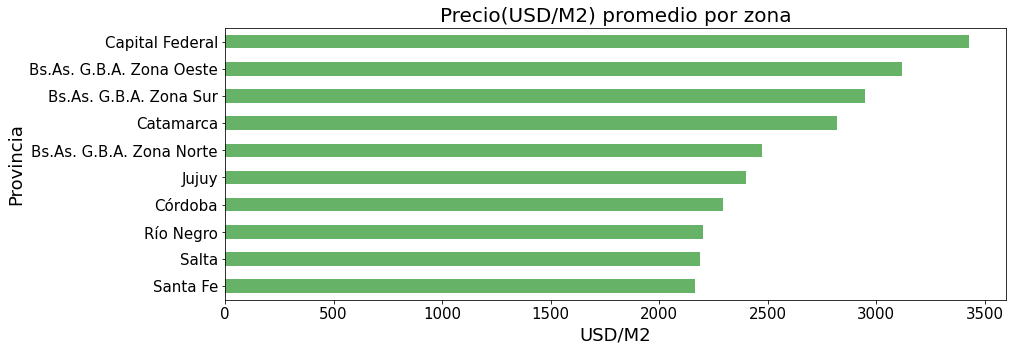

In [76]:
dfzone = promedio_porvincia.groupby('Provincia').mean()['Precio_final_M2_USD'].sort_values(ascending=False)[0:10]
g = dfzone.sort_values().plot.barh(figsize=(14,5),color='g',fontsize=15, alpha=0.6);
g.set_title("Precio(USD/M2) promedio por zona", fontsize=20)
g.set_ylabel("Provincia", fontsize=18)
g.set_xlabel("USD/M2", fontsize=18)
plt.show()

In [77]:
#los valores superiores tienen logica, tambien los inferiores, pero podemos encontrar algunos casos interesantes.
#veamos en detalle Catamarca para ver porque da tan alto el precio por metro cuadrado
data.loc[data.Provincia=='Catamarca',['grupo_M2','rango_M2','Precio_USD_mediagrupo','Precio_USD','M2_Totales','M2_final','Precio_M2','Precio_final_M2_USD']]

,grupo_M2,rango_M2,Precio_USD_mediagrupo,Precio_USD,M2_Totales,M2_final,Precio_M2,Precio_final_M2_USD
6414,grupo 13,"(110.0, 130.0]",1.100281e+06,1100281.0,120.0,120.0,9166.666667,9169.01
8362,grupo 18,"(280.0, 365.0]",1.160296e+06,1100281.0,299.0,299.0,3678.929766,3679.87
8363,grupo 18,"(280.0, 365.0]",1.160296e+06,1190304.0,299.0,299.0,3979.933110,3980.95
8364,grupo 18,"(280.0, 365.0]",1.160296e+06,1190304.0,299.0,299.0,3979.933110,3980.95
8365,grupo 19,"(365.0, 600.0]",1.500383e+06,1500383.0,441.0,441.0,3401.360544,3402.23
8366,grupo 19,"(365.0, 600.0]",1.500383e+06,1500383.0,441.0,441.0,3401.360544,3402.23
8367,grupo 19,"(365.0, 600.0]",1.500383e+06,1500383.0,441.0,441.0,3401.360544,3402.23
8368,grupo 19,"(365.0, 600.0]",1.500383e+06,1500383.0,441.0,441.0,3401.360544,3402.23
8369,grupo 19,"(365.0, 600.0]",1.500383e+06,1500383.0,441.0,441.0,3401.360544,3402.23
16953,grupo 16,"(190.0, 228.0]",1.260000e+05,126000.0,200.0,200.0,630.000000,630.00


Un problema grande es que son pocos valores,y sobre todo que pertenecen a los grupos de mayor superficie, por lo que puede generar valores alto de Metro cuadrado.
si vemos la fila 6414, el precio por metro cuadrado es muy alto dado su grupo de superficie, por lo que tal vez sea un outlier

In [78]:
promedio_propiedad = data[~mask_0].groupby('Tipo_propiedad_nuevo')['Precio_final_M2_USD'].mean().to_frame()
promedio_propiedad.sort_values('Precio_final_M2_USD',ascending=False,inplace=True)
promedio_propiedad

,Precio_final_M2_USD
Tipo_propiedad_nuevo,
HOTEL,4808.950806
STORE,4577.266601
APARTMENT,2816.429222
COMPLEJO,2515.381248
DESARROLLO INMOBILIARIO,2433.853508
PH,2406.020439
HOUSE,2212.799744
EDIFICIO VENTA EN POZO,1840.000000
GALPON,1639.080318


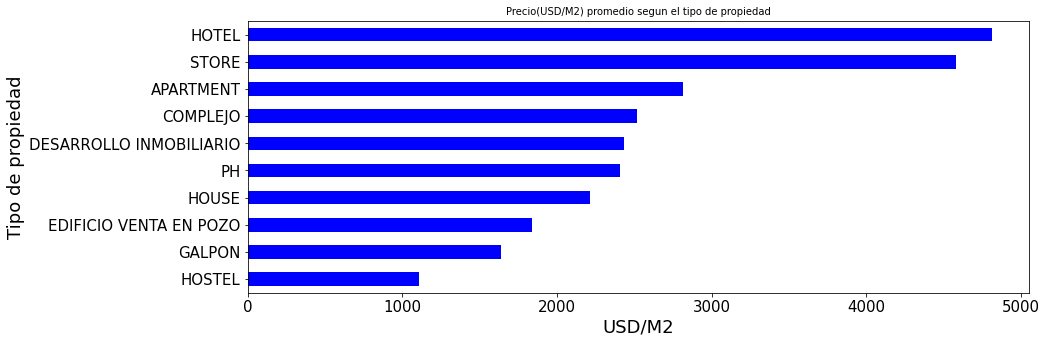

In [79]:
#Armamos los datos para el grafico
df_tipo_prop = promedio_propiedad.groupby('Tipo_propiedad_nuevo').mean()['Precio_final_M2_USD'].sort_values(ascending=False)[:]
graf = df_tipo_prop.sort_values().plot.barh(figsize=(14,5),fontsize=15, color='b')
graf.set_title("Precio(USD/M2) promedio segun el tipo de propiedad", fontsize=10)
graf.set_ylabel("Tipo de propiedad", fontsize=18)
graf.set_xlabel("USD/M2", fontsize=18)
plt.show()

In [80]:
promedio_grupoM2 = data[~mask_0].groupby(['grupo_M2','rango_M2'])['precio_final'].mean().to_frame()
promedio_grupoM2.sort_values('precio_final',ascending=False,inplace=True)
promedio_grupoM2.head(20)

,,precio_final
grupo_M2,rango_M2,
grupo 20,"(600.0, 5570.0]",634424.990930
grupo 19,"(365.0, 600.0]",563743.766906
grupo 18,"(280.0, 365.0]",420819.914373
grupo 17,"(228.0, 280.0]",378310.521193
grupo 15,"(155.0, 190.0]",326362.542376
grupo 16,"(190.0, 228.0]",325508.326362
grupo 14,"(130.0, 155.0]",286269.897650
grupo 13,"(110.0, 130.0]",252439.211831
grupo 12,"(95.0, 110.0]",217947.420000


Del promedio por metro cuadrado nos muestra que pueden existir posibles inconsistencias en el Grupo 1, ya que siendo los de menor superficie, no se encuentran al final de la lista.


In [81]:
promedio_barrio_caba = data[(data.Provincia =='Capital Federal') & data.M2_final>0].groupby('Barrio_2')['Precio_final_M2_USD'].mean().to_frame()
promedio_barrio_caba.sort_values('Precio_final_M2_USD',ascending=False,inplace=True)
promedio_barrio_caba.head(10)

,Precio_final_M2_USD
Barrio_2,
Villa Santa Rita,25428.443036
Versalles,16746.964528
Villa Soldati,15700.846429
Boedo,10269.863341
Puerto Madero,10151.933994
San Cristobal,8720.653622
Monte Castro,8085.710658
Paternal,5421.376024
Villa Devoto,5160.774414


Viendolo de esta manera, las medias de los precios en dolares no tienen lógica con lo que podria imaginarse para Capital Federal, veamos los prosibles problemas

In [82]:
data.loc[(data.Barrio_2 == 'Villa Santa Rita'),['Precio_USD_mediagrupo','Precio_USD','M2_Totales','M2_final','Precio_M2','Precio_final_M2_USD']].head(10)

,Precio_USD_mediagrupo,Precio_USD,M2_Totales,M2_final,Precio_M2,Precio_final_M2_USD
828,177000.000000,168000.0,20.0,20.0,8400.000000,8400.00
5002,160000.000000,160000.0,20.0,20.0,8000.000000,8000.00
8087,250000.000000,215000.0,1.0,1.0,215000.000000,215000.00
8092,250000.000000,240000.0,1.0,1.0,240000.000000,240000.00
8094,72450.000000,76000.0,34.0,34.0,2235.294118,2235.29
8745,370000.000000,340000.0,272.0,272.0,1954.022989,1250.00
13961,250000.000000,225000.0,1.0,1.0,225000.000000,225000.00
17367,118333.333333,115000.0,51.0,51.0,2446.808511,2254.90
19115,228000.000000,228000.0,185.0,185.0,1232.432432,1232.43
19213,125000.000000,125000.0,52.0,52.0,3125.000000,2403.85


Para Santa Rita vemos que el problema surge por la cantidad de veces que M2_totales es 1, lo cual es imposible.

In [83]:
data.loc[(data.Barrio_2 == 'Villa Soldati'),['Precio_USD_mediagrupo','Precio_USD','M2_Totales','M2_final','Precio_M2','Precio_final_M2_USD']]

,Precio_USD_mediagrupo,Precio_USD,M2_Totales,M2_final,Precio_M2,Precio_final_M2_USD
10426,62500.0,86000.0,50.0,50.0,1720.000000,1720.00
18040,55523.0,55523.0,60.0,60.0,16500.000000,925.38
28978,95000.0,95000.0,78.0,78.0,1217.948718,1217.95
29310,100000.0,100000.0,138.0,138.0,1000.000000,724.64
29621,240000.0,240000.0,595.0,595.0,564.705882,403.36
35572,69000.0,69000.0,88.0,88.0,784.090909,784.09
35576,69000.0,69000.0,88.0,88.0,784.090909,784.09
48959,48000.0,48000.0,80.0,80.0,600.000000,600.00
51721,127000.0,127000.0,145.0,145.0,875.862069,875.86
54466,73000.0,74000.0,58.0,58.0,1275.862069,1275.86


Para Soldati el error surge en la fila 66649, ya que tiene un valor demasiado extremo en su precio ($8.500.000). Debe ser un outlier. Esto ocasiona el problema. Deberia ser similar para los demas.

In [84]:
#Veamos si en lugar de pedir la media, pedimos la mediana
data.loc[(data.Barrio_2 == 'Villa Soldati'),['Precio_USD_mediagrupo','Precio_USD','M2_Totales','M2_final','Precio_M2','Precio_final_M2_USD']].median()

Precio_USD_mediagrupo    73000.000000
Precio_USD               86000.000000
M2_Totales                  79.000000
M2_final                    79.000000
Precio_M2                  937.931034
Precio_final_M2_USD        900.620000
dtype: float64

El precio por metro cuadrado termina siendo mucho menor. Veamos el mismo cálculo para los barrios de CABA pero usando la mediana.

In [85]:
promedio_barrio_caba = data[(data.Provincia =='Capital Federal') & data.M2_final>0].groupby('Barrio_2')['Precio_final_M2_USD'].median().to_frame()
promedio_barrio_caba.sort_values('Precio_final_M2_USD',ascending=False,inplace=True)
promedio_barrio_caba.head(10)

,Precio_final_M2_USD
Barrio_2,
Boedo,6184.515
Puerto Madero,5798.500
Las Cañitas,3428.570
Palermo,3166.140
Recoleta,3131.310
Belgrano,3028.740
Nuñez,2920.000
Barrio Norte,2872.730
Retiro,2766.990


Uilizando la mediana, tenemos un set mas acorde a lo que deberia ser la realidad.

# Análisis geoespacial

Analizamos la posicion geoespacial de los datos del dataset.

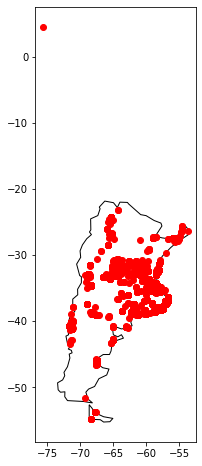

In [86]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_arg = world[world.name=='Argentina']
points=gpd.points_from_xy(data.Longitud,data.Latitud)
geo_puntos_propiedades=gpd.GeoDataFrame(data,geometry = points)

def graficar(p_ciudad, p_pais):
    """Grafica ciudades sobre el mapa del pais"""
    
    ax = p_pais.plot(color='white', edgecolor='black',figsize=(10,8))

    # Sobre las ciudades superpone el mapa del país
    p_ciudad.plot(ax=ax, color='red')

graficar(geo_puntos_propiedades, geo_arg)

plt.show()

Detectamos mal cargada una de las locaciones.

In [87]:
data.loc[data.Latitud >0]

,Index,Propiedad,Barrio,Ubicacion,Pais,Provincia,ID_GeoName,Latitud_Longitud,Latitud,Longitud,...,grupo_M2,rango_M2,Precio_USD_mediagrupo,precio_final,grupo_Precios,rango_precios,M2_mediagrupo,M2_final,Precio_final_M2_USD,geometry
9394,9761,house,Córdoba,|Argentina|Córdoba|,Argentina,Córdoba,3860255.0,"4.5458426,-75.67893099",4.545843,-75.678931,...,NaN,NaN,NaN,0.0,grupo M2 1,"(-0.001, 53200.0]",137.616822,137.616822,0.0,POINT (-75.67893 4.54584)


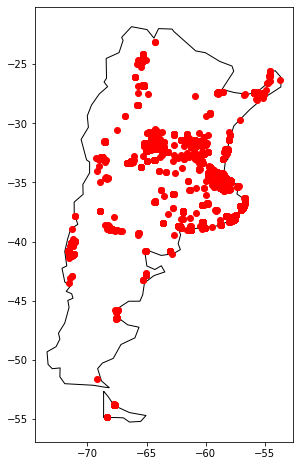

In [88]:
graficar(geo_puntos_propiedades.loc[geo_puntos_propiedades.Latitud<0], geo_arg)

plt.show()

Se observa la mayor concentracion en CABA, Prov. Bs As., Cordoba y Santa Fe.
Muy poca carga en la zona sur, oeste y norte del país.

Observamos como se componen las agrupaciones de cantidad de propiedades por provincia para corroborar lo visto anteriormente.

In [89]:
#Reemplazo por Caba + Pcia todas las variantes observadas en la columna provincia para estas localidades.
reemplazos={'Capital Federal':'C.A.B.A. + PCIA. BS. AS.','Buenos Aires Interior':'C.A.B.A. + PCIA. BS. AS.','Bs.As. G.B.A. Zona Norte':'C.A.B.A. + PCIA. BS. AS.'
            ,'Bs.As. G.B.A. Zona Sur':'C.A.B.A. + PCIA. BS. AS.','Buenos Aires Costa Atlántica':'C.A.B.A. + PCIA. BS. AS.','Bs.As. G.B.A. Zona Oeste':'C.A.B.A. + PCIA. BS. AS.'}
Propiedad_xprovincia=pd.DataFrame(data.Provincia.replace(reemplazos).value_counts())
#Creo una columna con la ponderacion de cada localidad
Propiedad_xprovincia['Ponderacion']= ((Propiedad_xprovincia.Provincia/Propiedad_xprovincia.Provincia.sum())*100).round(5)
Propiedad_xprovincia

,Provincia,Ponderacion
C.A.B.A. + PCIA. BS. AS.,92127,78.32863
Córdoba,11493,9.77163
Santa Fe,9056,7.69963
Río Negro,743,0.63172
Neuquén,649,0.55180
Tucumán,588,0.49993
Mendoza,567,0.48208
Corrientes,562,0.47783
Misiones,452,0.38430
Entre Ríos,338,0.28738


Notar que entre CABA, Prov de Bs As, Cordoba y Santa Fe componen el 95% de los datos.


In [90]:
###Armamos una lista con las provincias. Se evalua si corresponde dropear. Dejaremos esta linea comentada.
#Prov_Dropear=[]
#for i in range(Propiedad_xprovincia.shape[0]):
#    if Propiedad_xprovincia.Ponderacion.iloc[i] < 1:
#        Prov_Dropear.append(Propiedad_xprovincia.index[i])

In [91]:
###Dejaremos esta linea comentada. Conexión con Yfinance para recuperar tasa de cambio.
#pip install yfinance
#import yfinance as yf
#yf.download('ARS=X', period='1d')

# Analisis adicional: correlación de variables

¿Existe alguna correlación entre las variables? Para esto, generamos una matriz de correlación sobre el dataframe final.
Luego, graficamos dicha matriz sobre un mapa de calor para mayor visibilidad.

NameError: name 'sns' is not defined

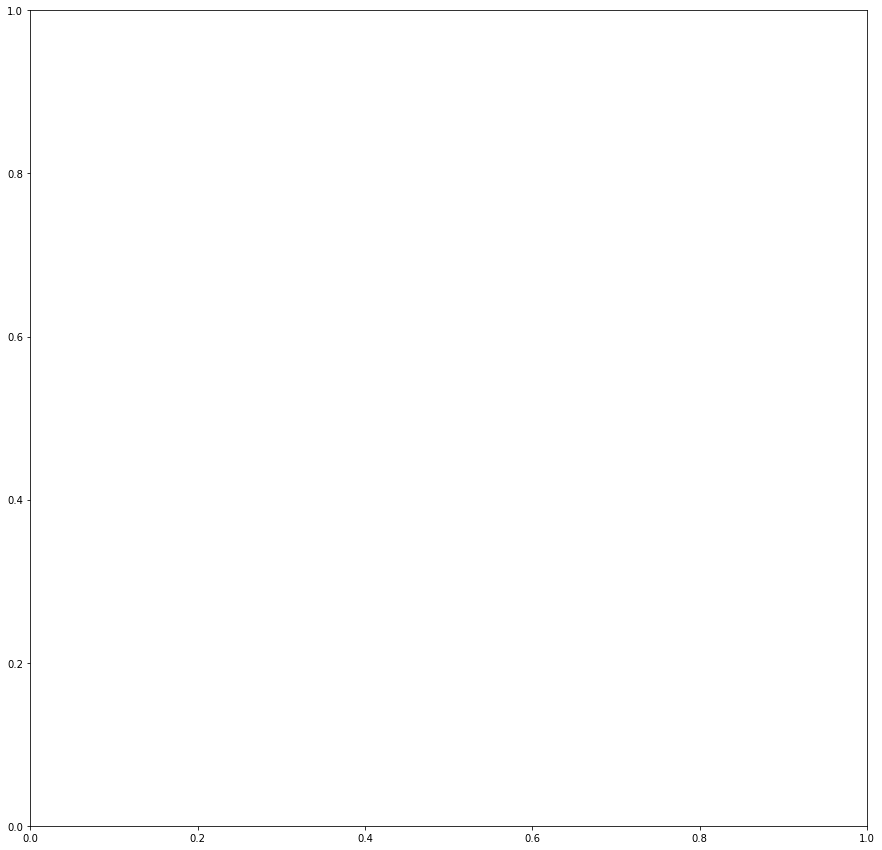

In [92]:
#import seaborn as sns 
#Creación de matriz de correlación con sentencia DataFrame.corr()
df_corr = data.corr()

#Agregamos la creación del mapa de calor sobre la matriz:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df_corr, square=True, annot=True, ax=ax)

# DataSet resultante

Exportamos a .csv el dataset resultante.

In [ ]:
data.to_csv('DataSet_limpio.csv')